[[-8.50134913e-04]
 [-2.44140625e-04]
 [-4.76837158e-07]
 [ 3.03013749e-05]]


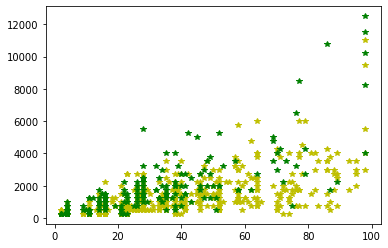

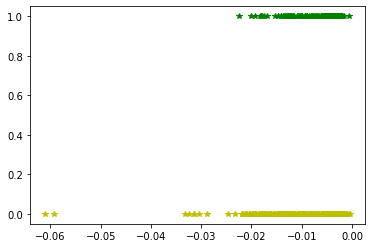

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def linear_analysis(a):
    a0 = []
    a1 = []
    u0 = []
    u1 = []
    for l in a:
        cg = l.pop()
        if cg == 0:
            a0.append(l)
        else:
            a1.append(l)
    
    a0 = np.mat(a0)
    a1 = np.mat(a1)
    u0=np.mean(a0,axis=0)
    u1=np.mean(a1,axis=0)
    wsm0=np.matmul((a0-u0).T,(a0-u0))
    wsm1=np.matmul((a1-u1).T,(a1-u1))
    Sw=wsm0+wsm1
    
    w=np.matmul(Sw.I,(u0-u1).transpose(1,0))
    x0=np.matmul(a0,w)
    x1=np.matmul(a1,w)
    y0=[0 for i in range(len(x0))]
    y1=[1 for i in range(len(x1))]

    print(w)
    plt.plot(a0[:,3], a0[:,2], 'y*')
    plt.plot(a1[:,3], a1[:,2], 'g*')
    plt.show()
    plt.plot(x0, y0, 'y*')
    plt.plot(x1, y1, 'g*')
    plt.show()
if __name__ == '__main__':
    a=[]
    with open(r'blood_data.txt','r') as f:
        for line in f.readlines():
            b = []
            for x in line.split(','):
                b.append(int(x))
            a.append(b)
    linear_analysis(a)
